## 환경설정

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys

# warming 제거
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid')
    rc('font', family=font_name)

In [3]:
# only for Google Colab users
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

## 데이터프레임 불러오기

In [36]:
# for Google Colab # 구글 드라이브와 연동하는 코드 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/그핵/메인팀플/train.csv", encoding='utf-8')
df.head()

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points
0,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86
3,US,This is the winery's best Nebula in years. Whi...,Nebula,29.0,California,Paso Robles,Central Coast,NaN,NaN,Midnight 2010 Nebula Cabernet Sauvignon (Paso ...,Cabernet Sauvignon,Midnight,87
4,US,This is a very rich Pinot whose primary virtue...,Wiley Vineyard,40.0,California,Anderson Valley,NaN,NaN,NaN,Harrington 2006 Wiley Vineyard Pinot Noir (And...,Pinot Noir,Harrington,88


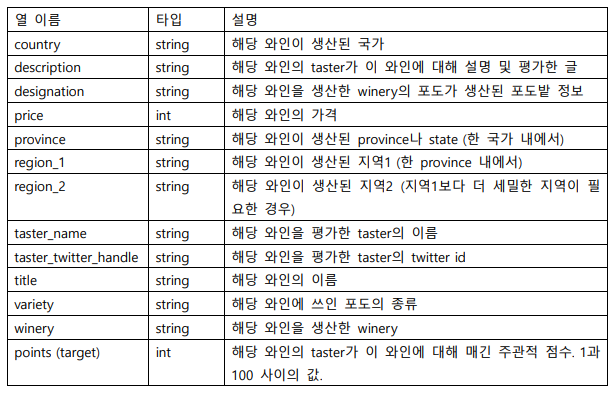

중복제거 필요

## EDA

### 기본 정보

In [6]:
# 데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103976 entries, 0 to 103975
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                103925 non-null  object 
 1   description            103976 non-null  object 
 2   designation            73967 non-null   object 
 3   price                  96781 non-null   float64
 4   province               103925 non-null  object 
 5   region_1               86954 non-null   object 
 6   region_2               40408 non-null   object 
 7   taster_name            83005 non-null   object 
 8   taster_twitter_handle  78994 non-null   object 
 9   title                  103976 non-null  object 
 10  variety                103975 non-null  object 
 11  winery                 103976 non-null  object 
 12  points                 103976 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 10.3+ MB


In [7]:
# 데이터 결측값 비율 확인
df.isnull().sum()/len(df)*100

country                   0.049050
description               0.000000
designation              28.861468
price                     6.919866
province                  0.049050
region_1                 16.371086
region_2                 61.137186
taster_name              20.169077
taster_twitter_handle    24.026698
title                     0.000000
variety                   0.000962
winery                    0.000000
points                    0.000000
dtype: float64

region_2의 결측치 비율이 전체의 61%. region_2는 해당 칼럼을 제거.

In [8]:
# region_2 칼럼 제거
df = df.drop(['region_2'], axis=1)

In [45]:
feature = df.loc[:, ['country', 'price', 'province', 'taster_name', 'variety']]

In [55]:
feature_drop = feature.loc[(feature['taster_name'].notnull()), :]

In [57]:
len(feature_drop)

83005

In [56]:
feature_drop.isnull().sum()

country          51
price          5810
province         51
taster_name       0
variety           0
dtype: int64

사용하고자 하는 feature가 있다면 결측값은 모두 제거하는 것이 좋을 것 같음. 애초에 수치형 자료가 price 뿐이기 때문에 대체하기 어려움.

### 수치형 자료

In [9]:
df.describe()

,price,points
count,96781.000000,103976.000000
mean,35.437410,88.448575
std,42.425377,3.040322
min,4.000000,80.000000
25%,17.000000,86.000000
50%,25.000000,88.000000
75%,42.000000,91.000000
max,3300.000000,100.000000


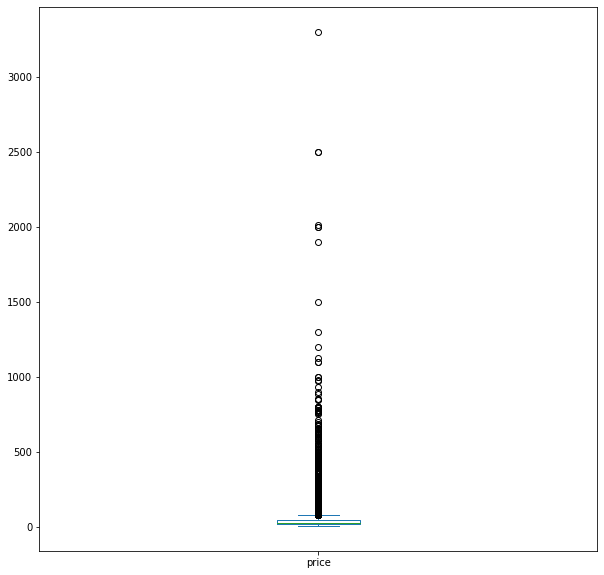

In [10]:
df['price'].plot.box(figsize=(10,10))

와인 가격의 중앙값이 25. 이보다 훨씬 큰 1000 이상의 가격을 갖는 와인도 존재함. 

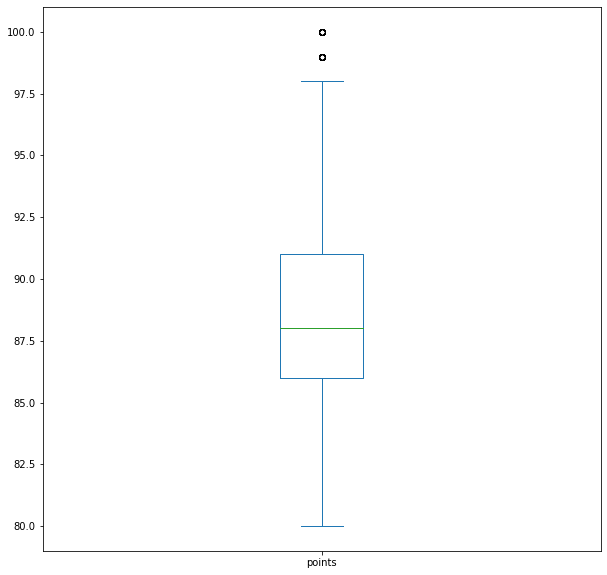

In [11]:
df['points'].plot.box(figsize=(10,10))

In [12]:
# price와 points의 상관관계
df_corr = df[['price', 'points']]
df_corr.corr()

,price,points
price,1.000000,0.406177
points,0.406177,1.000000


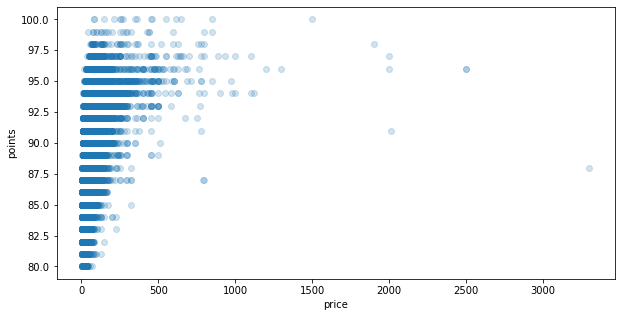

In [13]:
# 시각화
plt.figure(figsize=(10,5))
plt.scatter(data=df_corr, x='price', y='points', alpha=0.2)
plt.xlabel('price') 
plt.ylabel('points') 
plt.show()

1000 이상의 값 때문에 1000 이하의 값이 뭉쳐져 경향성이 눈에 띠지 않음.

In [14]:
# 이상치 기준 정하기
Q1 = df.describe()['price']['25%']
Q3 = df.describe()['price']['75%']
IQR = Q3-Q1 
max = Q3 + 3*IQR
min = Q1 - 3*IQR
max

117.0

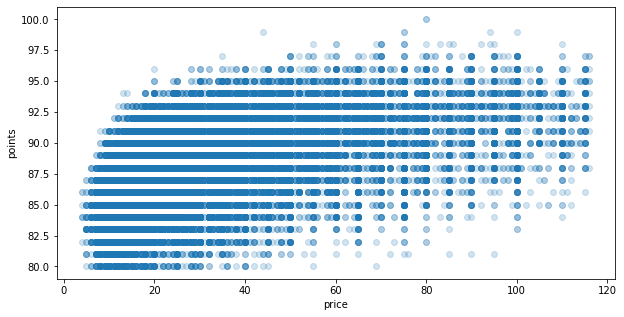

In [39]:
# price에서 IQR 이상의 값을 제거
# 시각화
price_cut = df.loc[df['price']<max, :]
plt.figure(figsize=(10,5))
plt.scatter(data=price_cut, x='price', y='points', alpha=0.2)
plt.xlabel('price') 
plt.ylabel('points') 
plt.show()

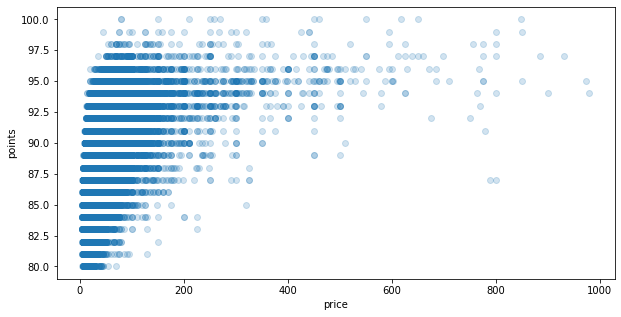

In [16]:
# price에서 1000 이상의 값을 제거
# 시각화
price_cut = df.loc[df['price']<1000, :]
plt.figure(figsize=(10,5))
plt.scatter(data=price_cut, x='price', y='points', alpha=0.2)
plt.xlabel('price') 
plt.ylabel('points') 
plt.show()

In [40]:
# price와 points의 상관관계
df_corr = price_cut[['price', 'points']]
df_corr.corr()

,price,points
price,1.000000,0.549403
points,0.549403,1.000000


가격

### 범주형 자료

In [17]:
df[['country']].value_counts()

country               
US                        43578
France                    17749
Italy                     15659
Spain                      5221
Portugal                   4593
Chile                      3589
Argentina                  3037
Austria                    2654
Australia                  1859
Germany                    1755
New Zealand                1128
South Africa               1094
Israel                      405
Greece                      375
Canada                      206
Hungary                     114
Bulgaria                    110
Romania                      97
Uruguay                      84
Turkey                       76
Slovenia                     72
Georgia                      70
Mexico                       63
Croatia                      57
England                      56
Moldova                      48
Brazil                       40
Lebanon                      29
Morocco                      22
Peru                         11
Serbia           

In [18]:
df[['designation']].value_counts()

designation                                
Reserve                                        1634
Estate                                         1041
Reserva                                         988
Riserva                                         523
Estate Grown                                    489
                                               ... 
Heritage Vines Alegria Vineyards                  1
Heritage Tree Vineyard Estate Rosé of Syrah       1
Heritage Tree Vineyard                            1
Heritage Selection Zen Ranch                      1
“P”                                               1
Length: 32961, dtype: int64

In [19]:
df[['province']].value_counts()

province                
California                  28941
Washington                   6916
Bordeaux                     4776
Tuscany                      4729
Oregon                       4313
                            ...  
Viile Timis                     1
Dalmatian Coast                 1
Krania Olympus                  1
Curicó and Maipo Valleys        1
Ticino                          1
Length: 407, dtype: int64

In [20]:
df[['region_1']].value_counts()

region_1                      
Napa Valley                       3599
Columbia Valley (WA)              3296
Russian River Valley              2459
California                        2067
Paso Robles                       1917
                                  ... 
Delia Nivolelli                      1
Côtes du Roussillon Les Aspres       1
Squinzano                            1
Côtes du Frontonnais                 1
Zonda Valley                         1
Length: 1188, dtype: int64

In [21]:
df[['taster_name']].value_counts()

taster_name       
Roger Voss            20536
Michael Schachner     12026
Kerin O’Keefe          8673
Paul Gregutt           7673
Virginie Boone         7591
Matt Kettmann          5109
Joe Czerwinski         4089
Sean P. Sullivan       3950
Anna Lee C. Iijima     3580
Jim Gordon             3279
Anne Krebiehl MW       2937
Lauren Buzzeo          1428
Susan Kostrzewa         855
Mike DeSimone           425
Jeff Jenssen            394
Alexander Peartree      319
Carrie Dykes            112
Fiona Adams              23
Christina Pickard         6
dtype: int64

In [22]:
df[['title']].value_counts()

title                                                             
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                9
Segura Viudas NV Extra Dry Sparkling (Cava)                           8
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)    6
Jacquart NV Brut Mosaïque  (Champagne)                                6
Korbel NV Brut Sparkling (California)                                 6
                                                                     ..
Drew 2009 Balo Vineyard Pinot Noir (Anderson Valley)                  1
Dreolino 2011 Riserva  (Chianti Rufina)                               1
Drei Donà Tenuta La Palazza 2010 Notturno Sangiovese (Forlì)          1
Drei Donà Tenuta La Palazza 2009 Rosenere Red (Forlì)                 1
Štoka 2011 Izbrani Teran (Kras)                                       1
Length: 96761, dtype: int64

In [23]:
df[['variety']].value_counts()
#mall_list = []
#if df[['variety']].value_counts()<=1 :
#    small_list.append()

variety                 
Pinot Noir                  10648
Chardonnay                   9399
Cabernet Sauvignon           7538
Red Blend                    7159
Bordeaux-style Red Blend     5510
                            ...  
Karalahna                       1
Kangoun                         1
St. Vincent                     1
Jampal                          1
Žilavka                         1
Length: 676, dtype: int64

In [24]:
df[['winery']].value_counts()

winery                       
Wines & Winemakers               182
DFJ Vinhos                       174
Testarossa                       173
Williams Selyem                  166
Louis Latour                     165
                                ... 
Jean-Paul Thevenet                 1
Jean-Pierre Large                  1
Jean-Pierre et Michel Auvigué      1
R. de Ayala Lete E Hijos           1
Montmassot                         1
Length: 15735, dtype: int64

### 범주형 - 연속형

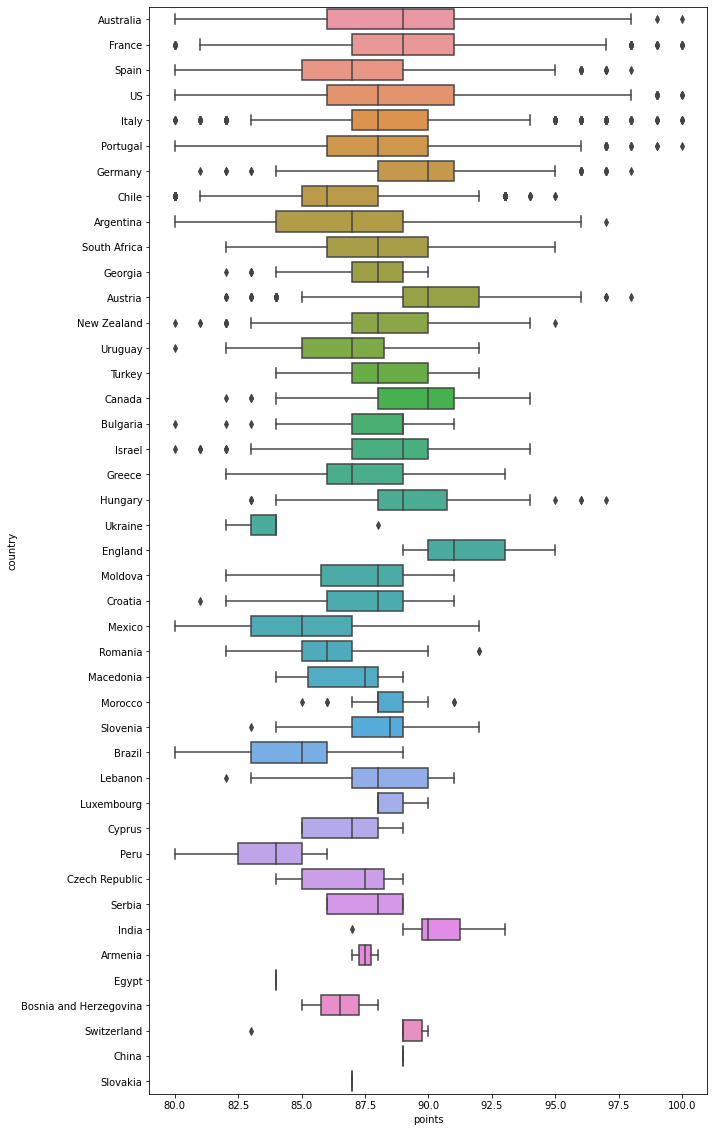

In [25]:
### country - points 
plt.figure(figsize=(10,20)) 
box = sns.boxplot(x='points', y='country', data=df)
box.set_xlabel("points")
box.set_ylabel("country")
plt.show()

쓸만함.

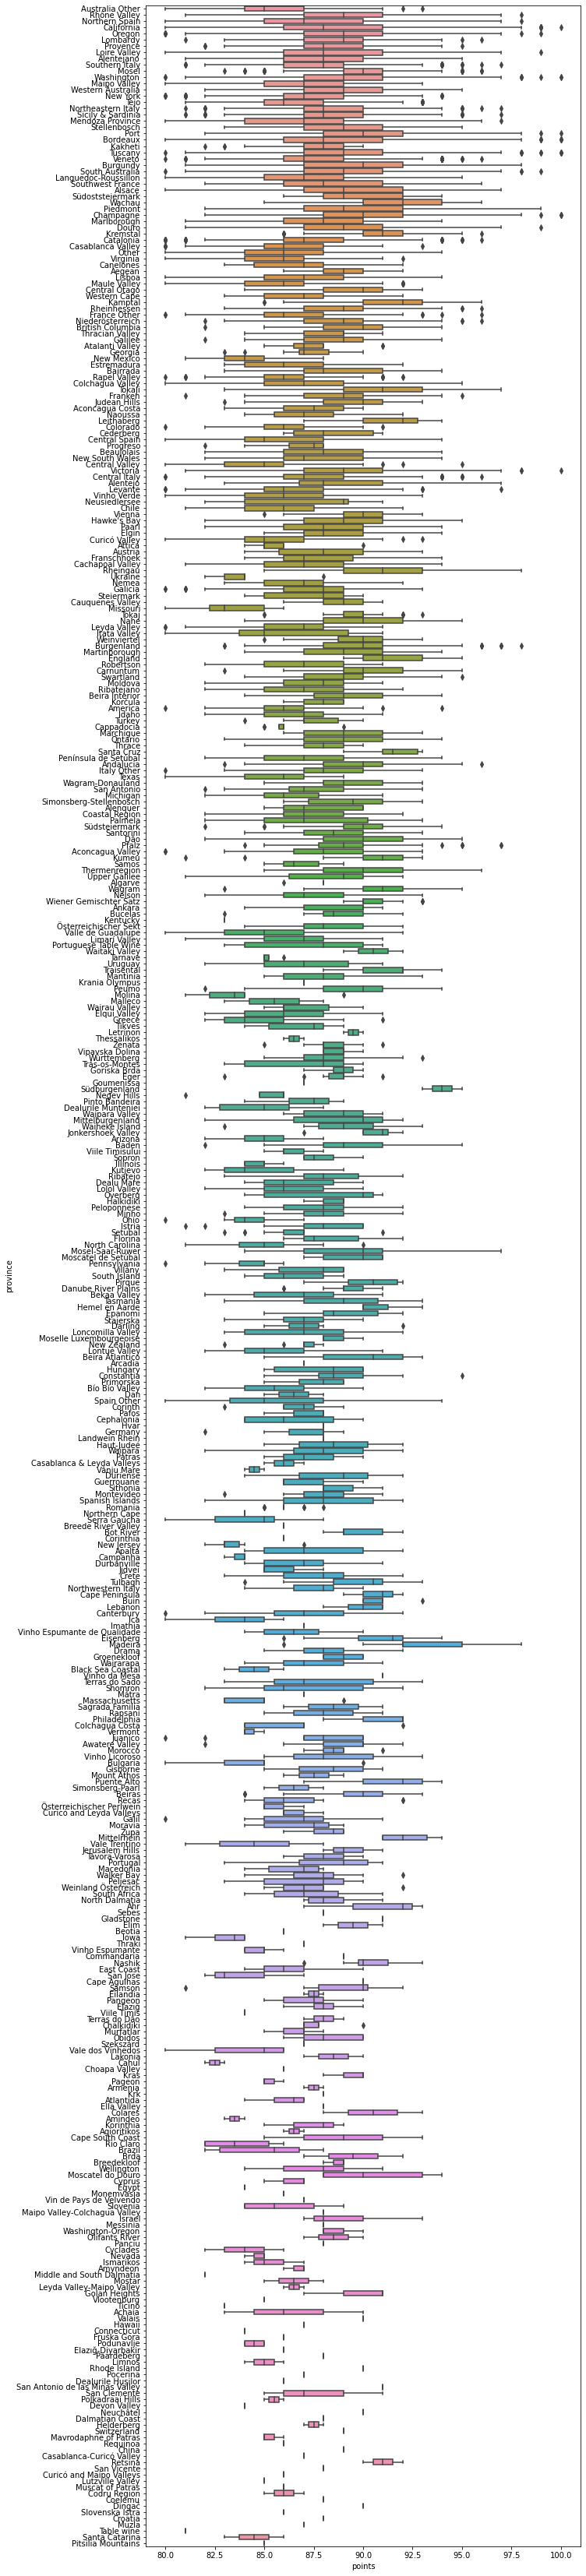

In [26]:
### province - points 
plt.figure(figsize=(10,60)) 
box = sns.boxplot(x='points', y='province', data=df)
box.set_xlabel("points")
box.set_ylabel("province")
plt.show()

쓸만함.

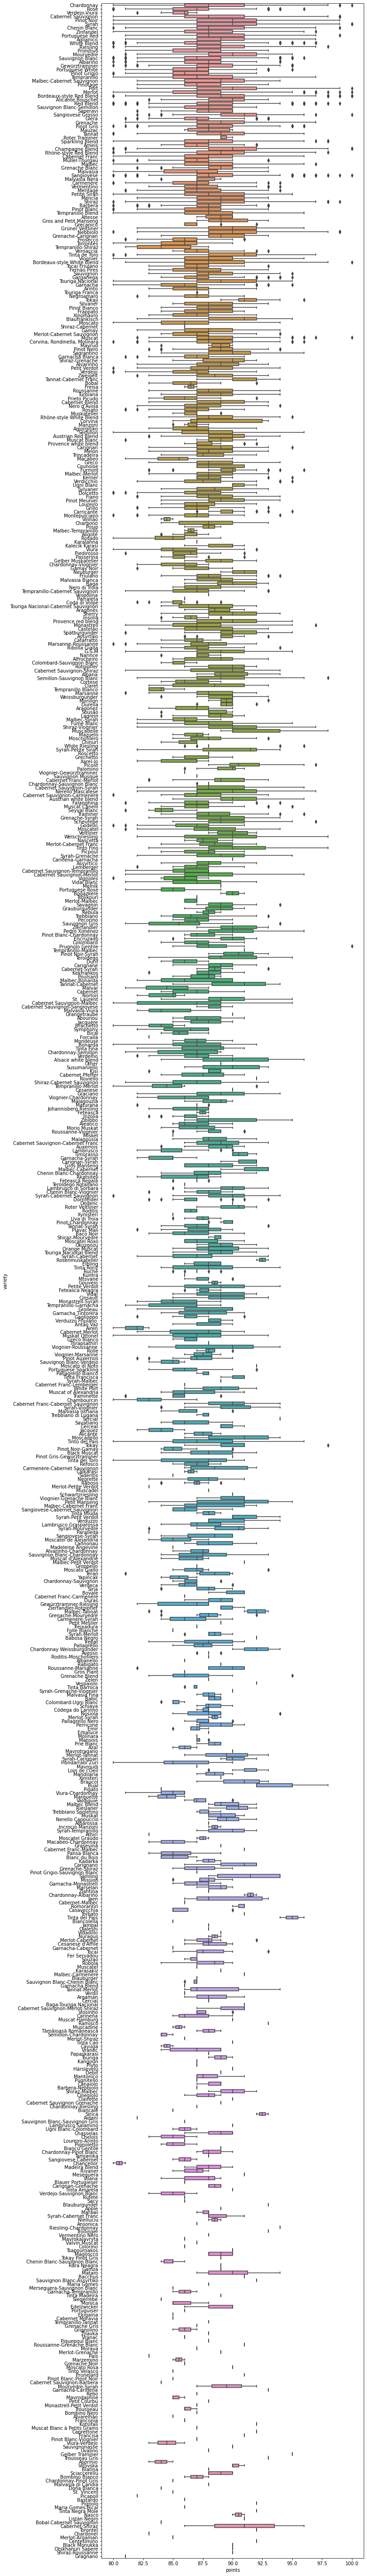

In [27]:
### variety - points 
plt.figure(figsize=(10,100)) 
box = sns.boxplot(x='points', y='variety', data=df)
box.set_xlabel("points")
box.set_ylabel("variety")
plt.show()

범위가 너무 넓음. 다른 것에 비해... 흠.. 고민

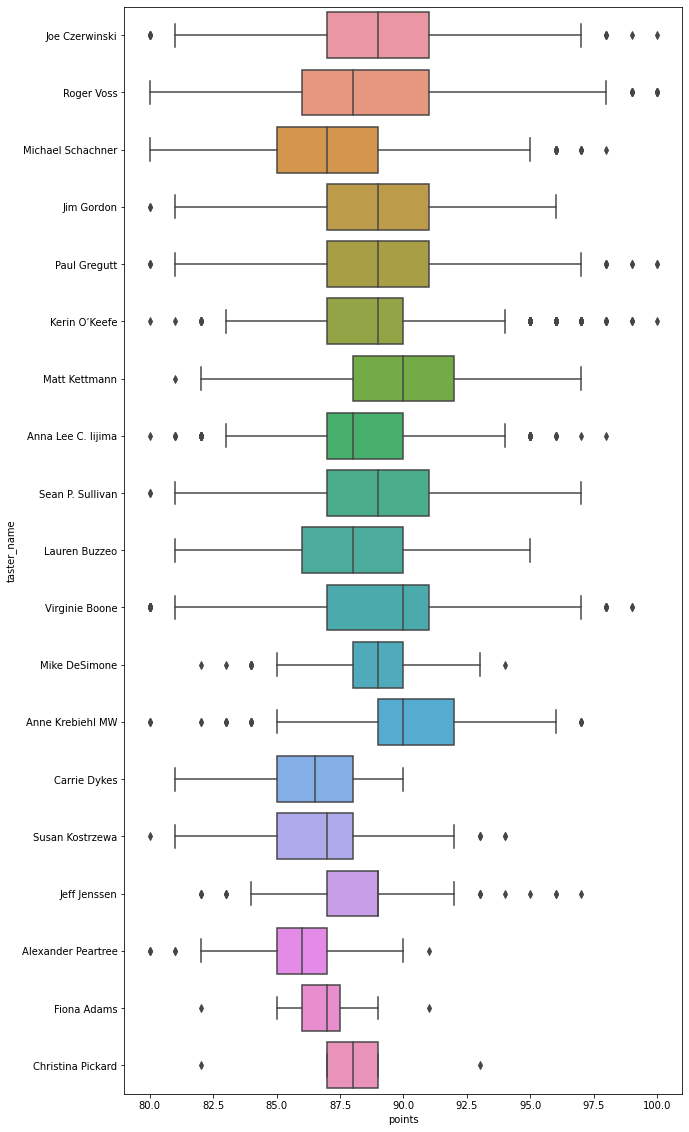

In [28]:
### taster_name - points 
plt.figure(figsize=(10,20)) 
box = sns.boxplot(x='points', y='taster_name', data=df)
box.set_xlabel("points")
box.set_ylabel("taster_name")
plt.show()

대부분이 넓지만 범위가 좁은 사람도 있기 때문에 고려해볼만함.

### 히트맵

In [29]:
# country / taster_name / points 평균으로 히트맵 그리기
base = df.groupby(['country', 'taster_name'])['points'].mean().unstack()

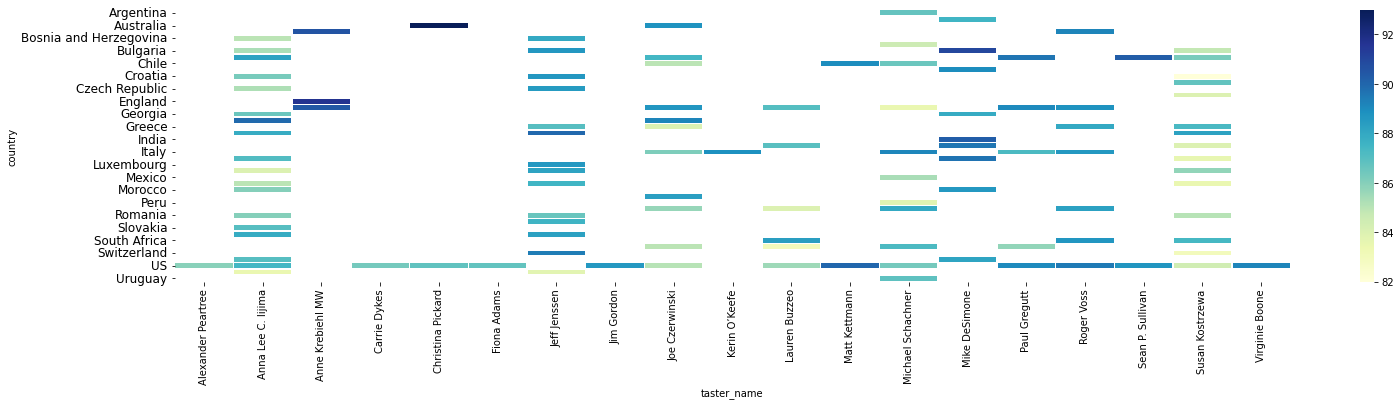

In [30]:
# 히트맵 그리기
fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(base, 
            annot=False, 
            ax=ax, 
            linewidths=.5, 
            fmt='.2f', 
            cmap="YlGnBu") 
plt.ylabel('country')
plt.xlabel('taster_name') 
plt.xticks(rotation=90) 
plt.yticks(fontsize=12)
plt.show()

In [31]:
# country / province / points 평균으로 히트맵 그리기
base = df.groupby(['country', 'province'])['points'].mean().unstack()

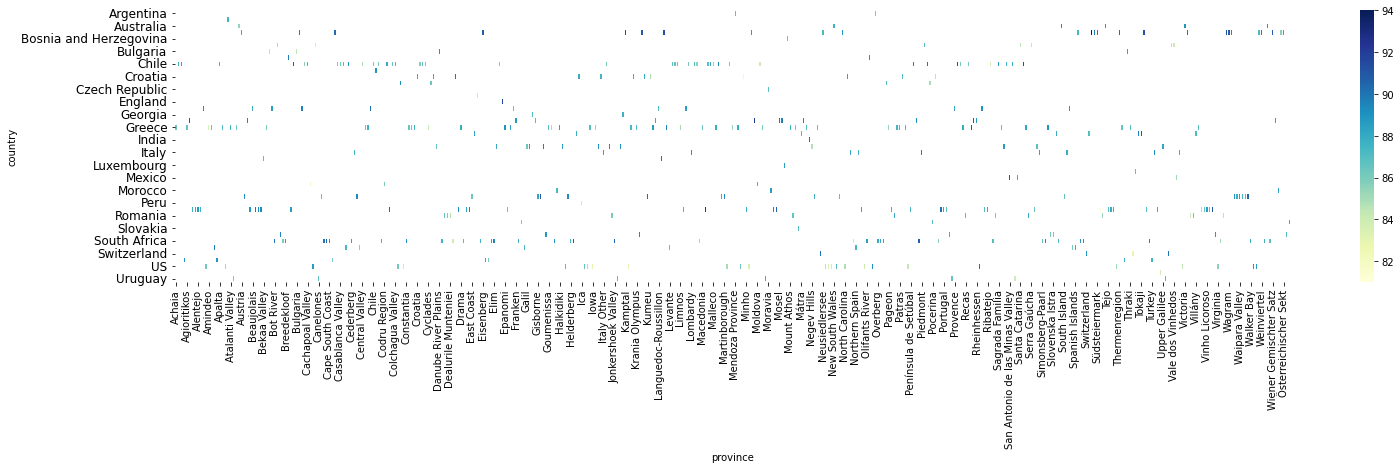

In [32]:
# 히트맵 그리기
fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(base, 
            annot=False, 
            ax=ax, 
            linewidths=.5, 
            fmt='.2f', 
            cmap="YlGnBu") 
plt.ylabel('country')
plt.xlabel('province') 
plt.xticks(rotation=90) 
plt.yticks(fontsize=12)
plt.show()

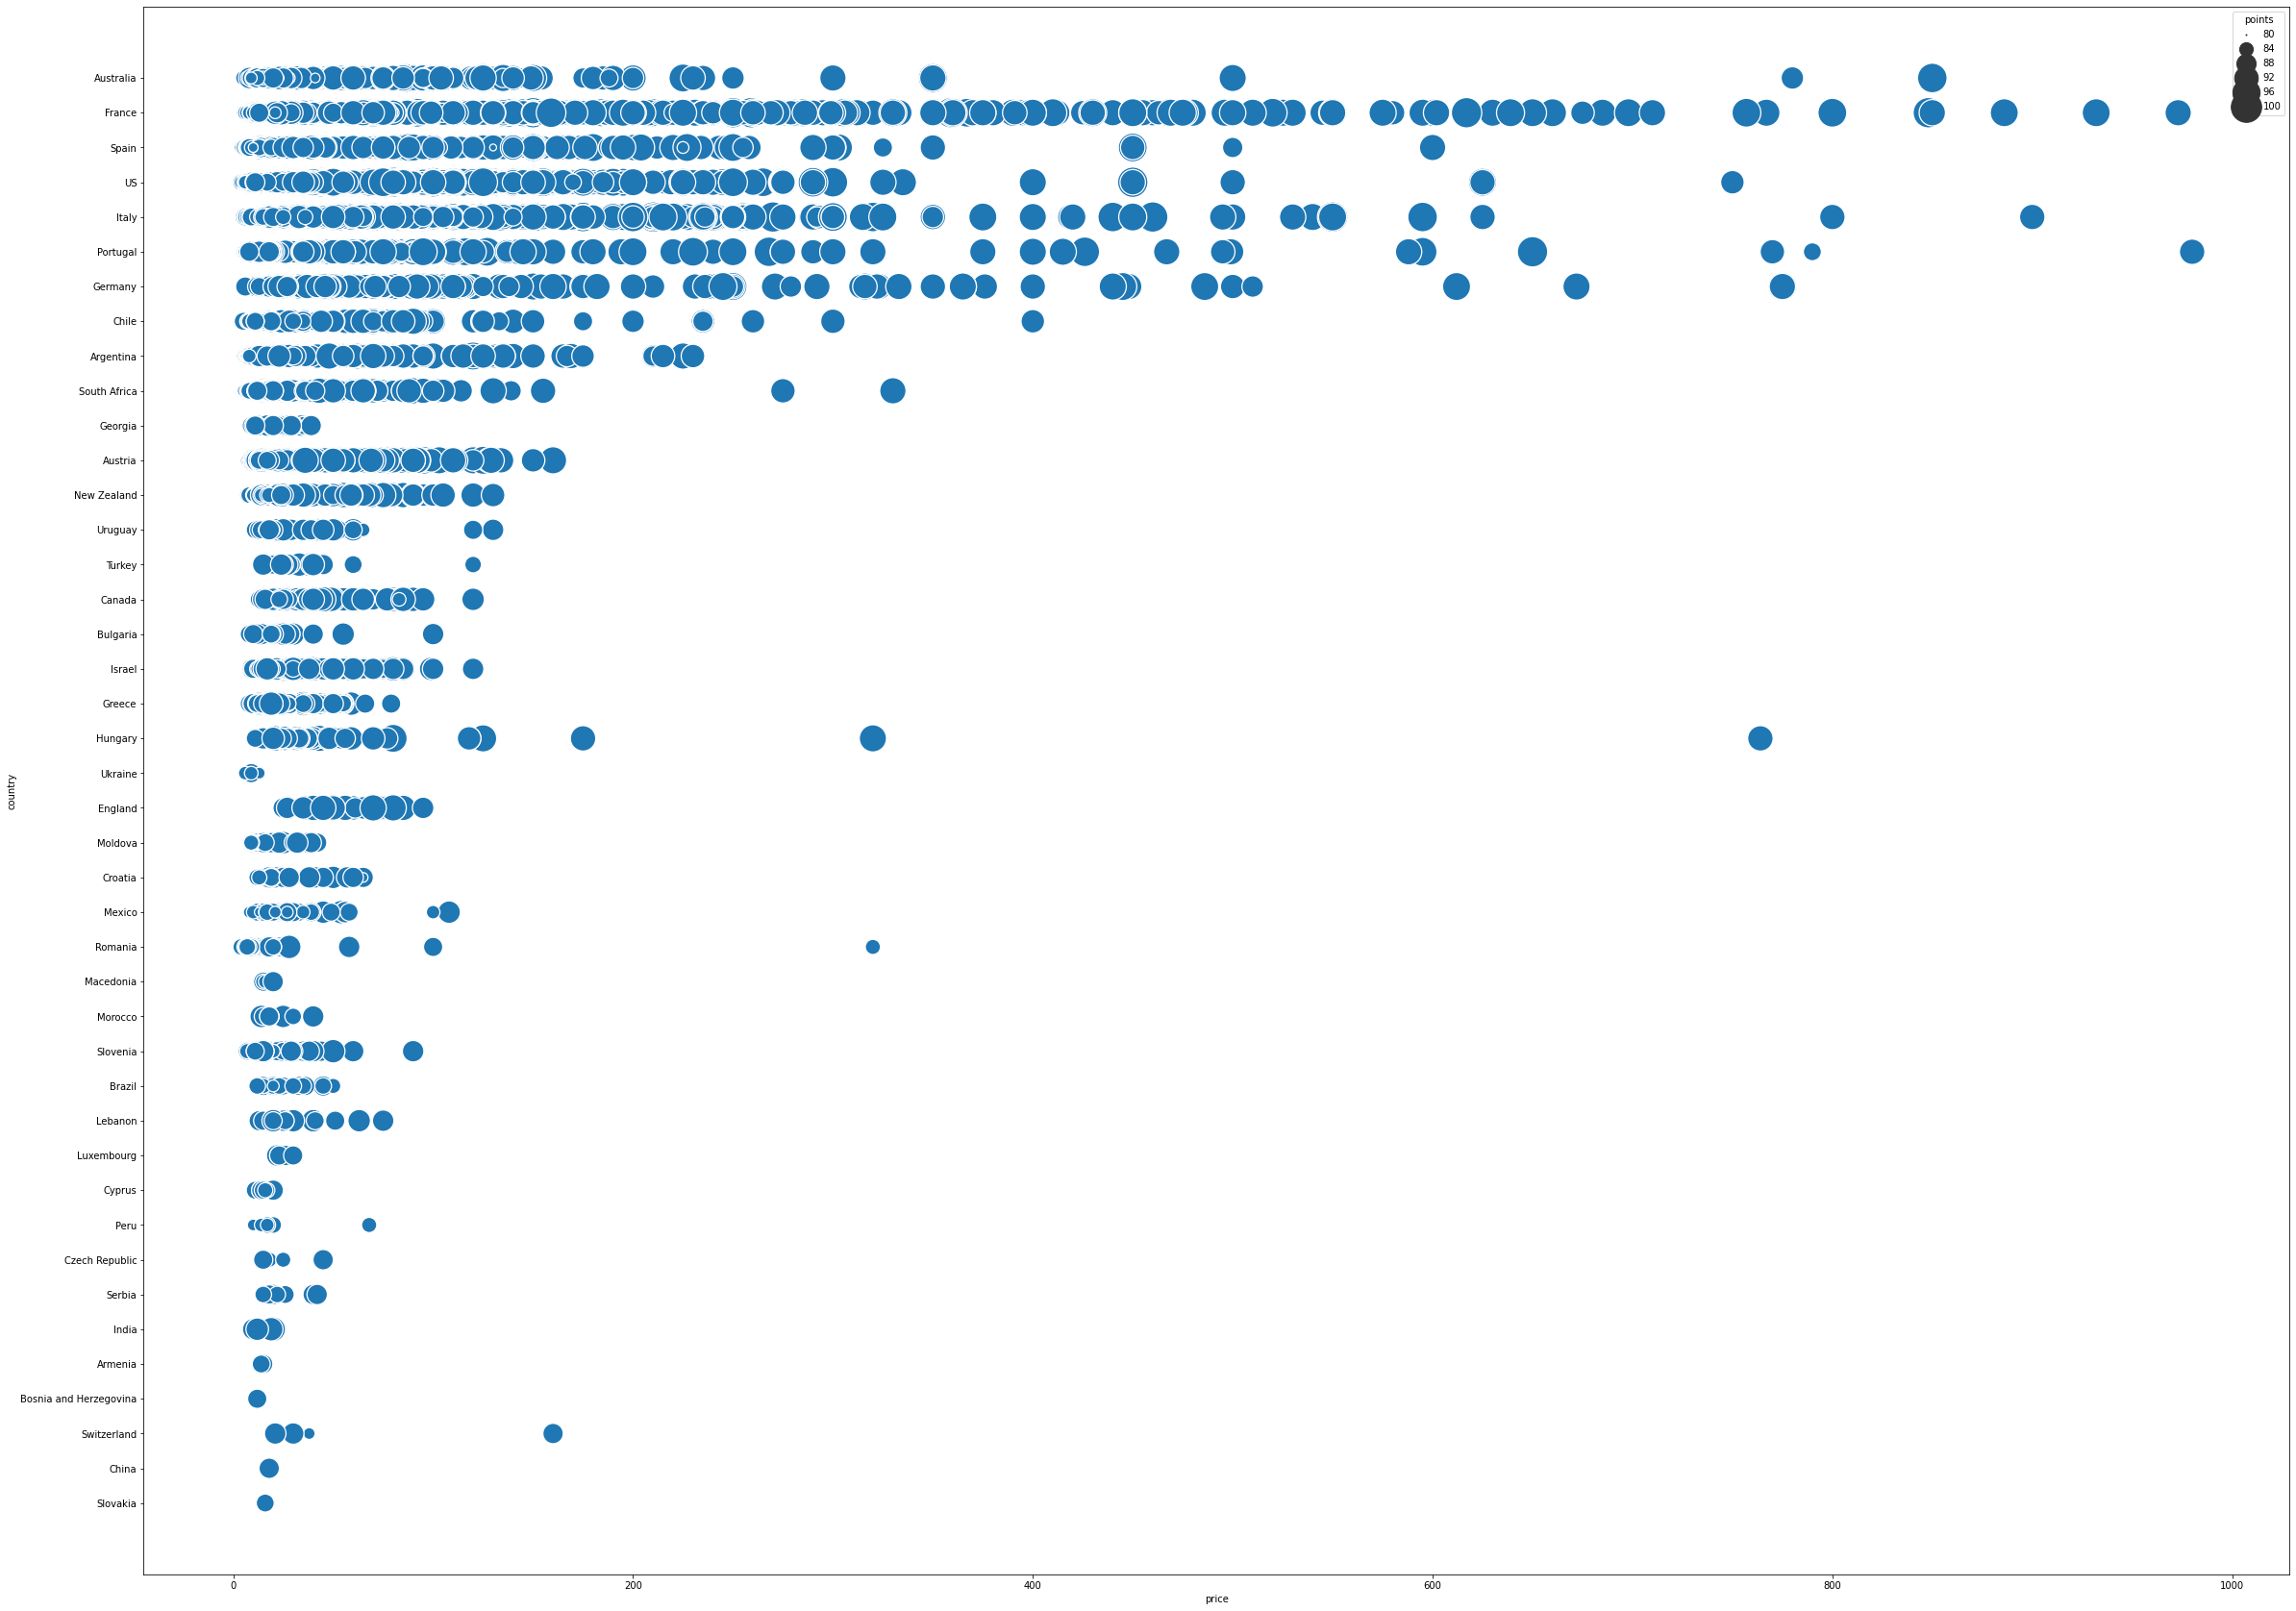

In [33]:
plt.figure(figsize= (40,30))
sns.scatterplot(data = price_cut, x = 'price', y = 'country', size = 'points', sizes=(1,1000))
plt.show()

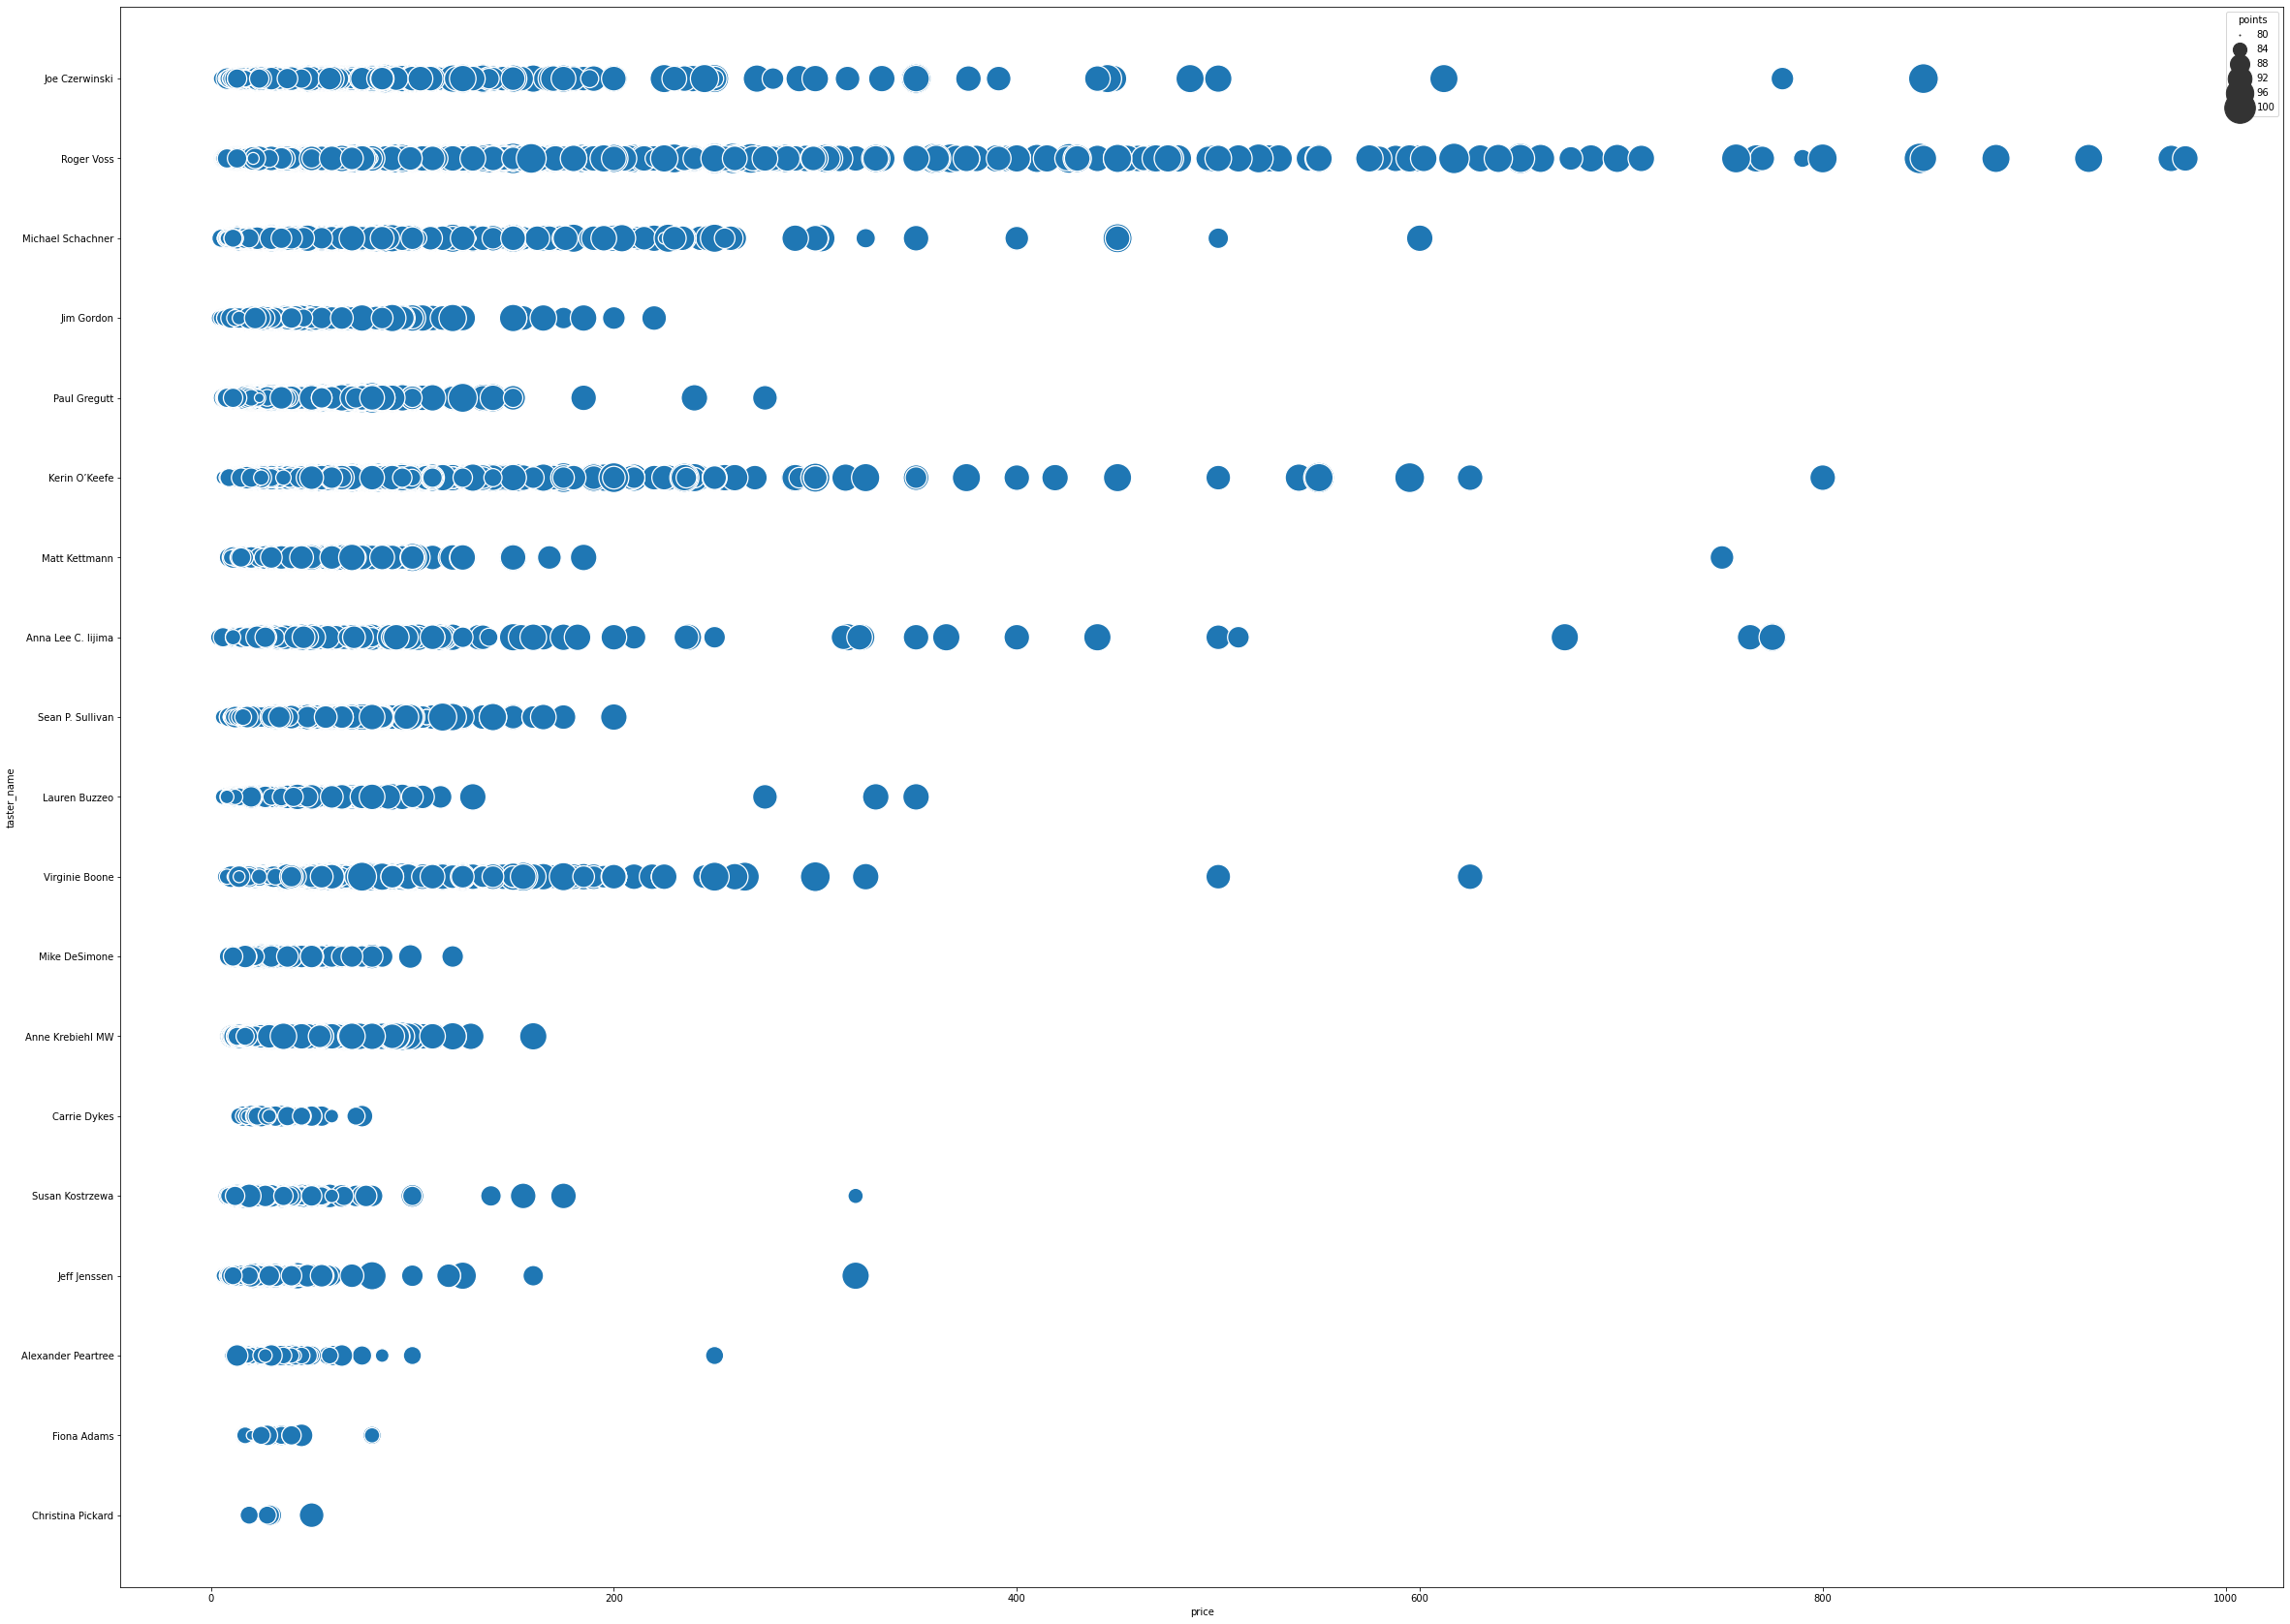

In [34]:
plt.figure(figsize= (40,30))
sns.scatterplot(data = price_cut, x = 'price', y = 'taster_name', size = 'points', sizes=(1,1000))
plt.show()

In [35]:
# taster 분산분석 돌려보기
